### Pattern Finder

Shapes: (625, 1000) (125, 200)


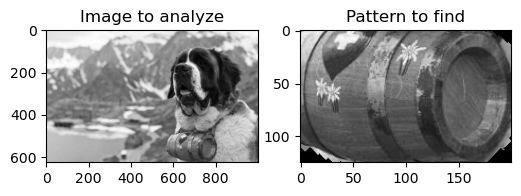

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("./assets/dog.png", cv2.IMREAD_GRAYSCALE)
kernel = cv2.imread("./assets/pattern-to-find.png", cv2.IMREAD_GRAYSCALE)

img = img.astype(np.int64)
kernel = kernel.astype(np.int64)

img[:] -= 128  
kernel[:] -= 128

# img[:] /= 255
# kernel[:] /= 255

print('Shapes:', img.shape, kernel.shape)

_, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(img + 128, cmap='gray')
axs[0].set_title('Image to analyze')

axs[1].imshow(kernel + 128, cmap='gray')
axs[1].set_title('Pattern to find')
plt.show()

In [9]:
from math import sqrt
def cosine_similarity(a1, a2):
  euclidean_norm = lambda a: sqrt((a**2).sum())
  return np.dot(a1, a2) / (euclidean_norm(a1) * euclidean_norm(a2))

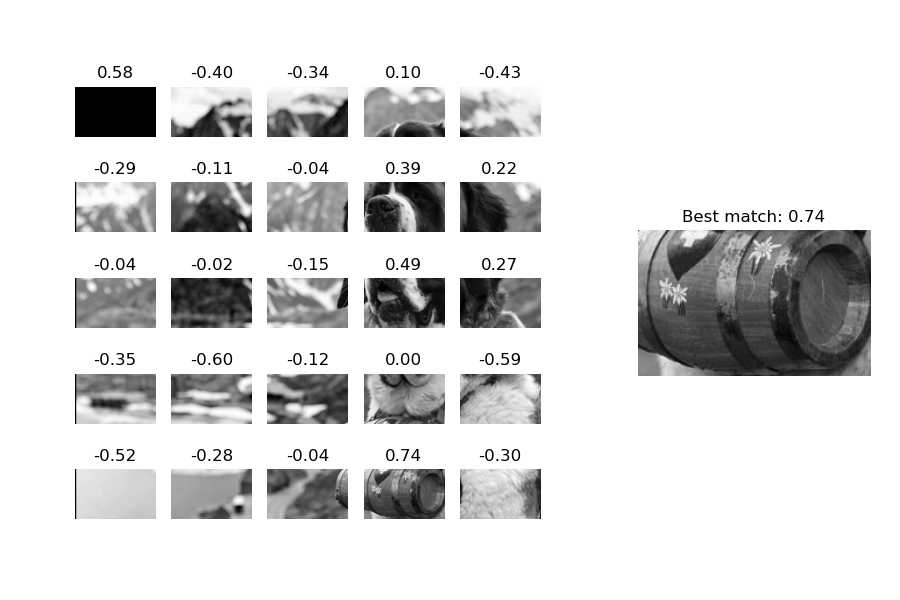

In [10]:
from PIL import Image
from utils import merge_imgs

x_repeat = img.shape[0] // kernel.shape[0]
y_repeat = img.shape[1] // kernel.shape[1]

_, axs = plt.subplots(x_repeat, y_repeat, figsize=(6, 6))

best_match = kernel
best_match_score = 0
for i in range(x_repeat):
    for j in range(y_repeat):
            
        x_start = i * kernel.shape[0]
        x_end = x_start + kernel.shape[0]
        y_start = j * kernel.shape[1]
        y_end = y_start + kernel.shape[1]

        img_slice = img[x_start:x_end, y_start:y_end]
        if i == 0 and j == 0:
            img_slice[:]= -125
        score = cosine_similarity(img_slice.flatten(), kernel.flatten())
        # score = np.dot(img_slice.flatten(), kernel.flatten()) // 10_000_000
        axs[i, j].imshow(img_slice + 128, cmap='gray')
        axs[i, j].set_title(f'{score:.2f}')
        axs[i, j].axis('off')
        if score > best_match_score:
            best_match_score = score
            best_match = img_slice

plt.savefig('tmp_left.png')
plt.close()

plt.figure(figsize=(3, 6))
plt.imshow(best_match + 128, cmap='gray')
plt.axis('off')
plt.title(f'Best match: {best_match_score:.2f}')
plt.savefig('tmp_right.png')
plt.close()

merge_imgs(['tmp_left.png', 'tmp_right.png'])


## Filters

(1067, 1600, 3)

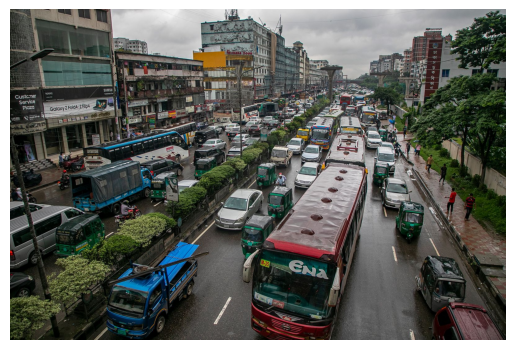

In [11]:

img = cv2.imread("./assets/traffic.jpg", cv2.IMREAD_COLOR)
img = img.astype(np.float32) / 255.0
img.shape

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img.shape

### Blur Filter

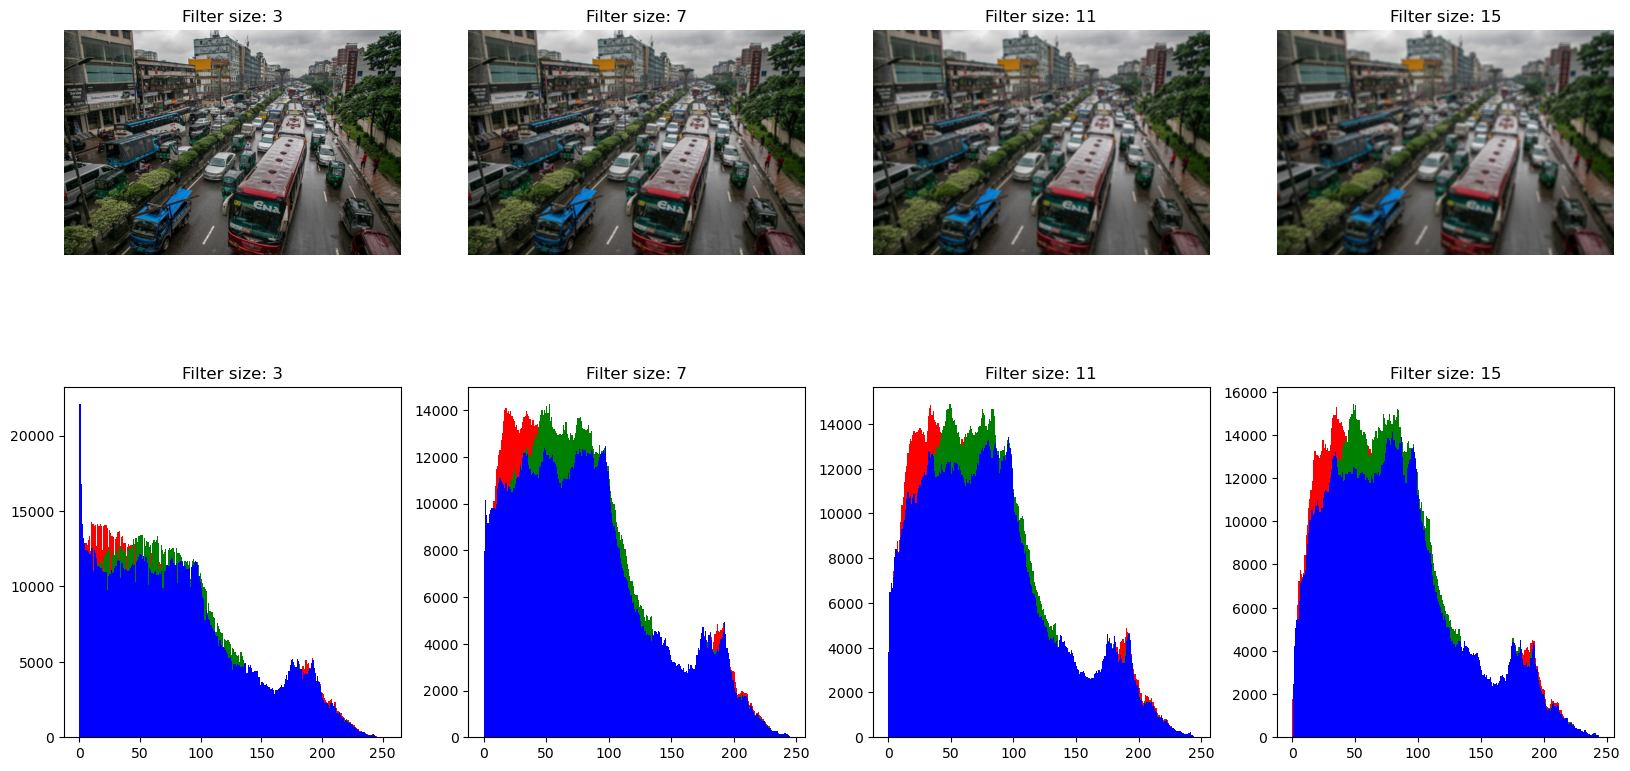

In [12]:
from scipy.ndimage import convolve
from utils import hist_image

def convolve_3d(img, filter):
  out = np.zeros_like(img, dtype=np.float32)
  for channel in range(3):
    out[:,:,channel] = convolve(img[:,:,channel], filter)
  return out

N = 4
_, axs = plt.subplots(2, N, figsize=(20, 10))
filtered_img = img
for i, size in enumerate(range(3, N*4, 4)):
  avg_filter = np.ones((size, size)) / (size * size)
  filtered_img = convolve_3d(img, avg_filter)
  axs[0][i].axis('off')
  axs[0][i].set_title(f"Filter size: {size}")
  axs[0][i].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
  hist_image(filtered_img, axs[1][i], f"Filter size: {size}")

plt.show()


### Gaussian Blur (approximation)

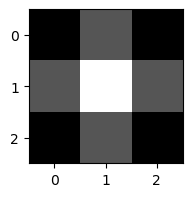

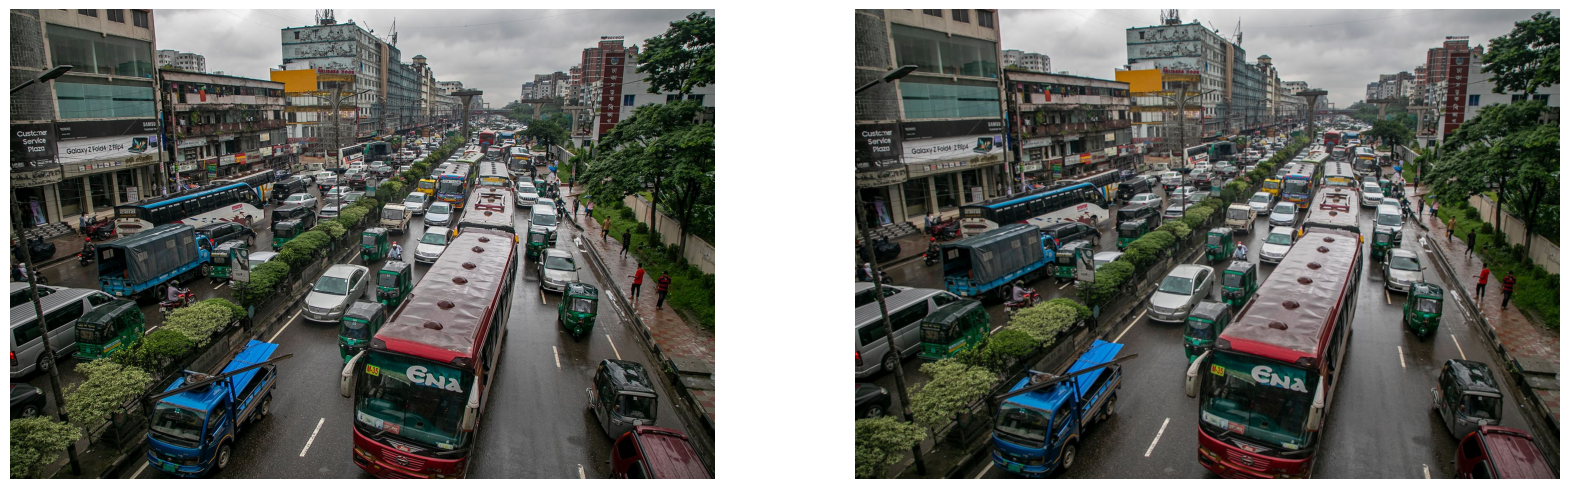

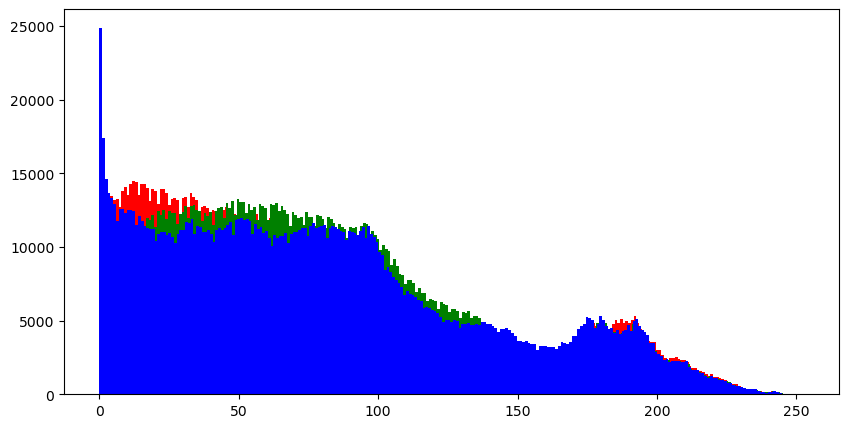

In [13]:
filter = np.array([
  [1,2,1],
  [2,4,2],
  [1,2,1]
], dtype=np.float32) / 16

filtered_img = convolve_3d(img, filter)

plt.figure(figsize=(2, 2))
plt.imshow(filter, cmap='gray')
plt.show()

_, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].axis('off')
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.show()

_, ax = plt.subplots(1, 1, figsize=(10, 5))
hist_image(filtered_img, ax)

plt.show()

## Contrast

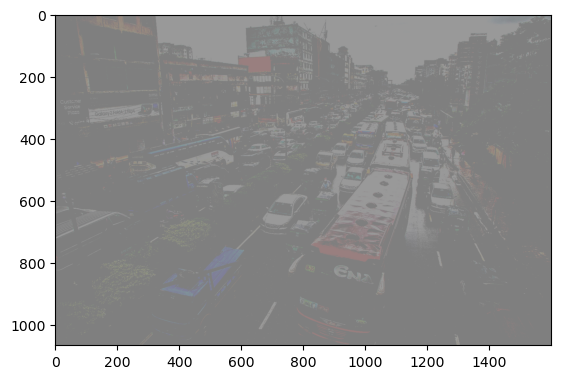

In [14]:
low_contrast = img.copy()
low_contrast[img < 0.5] = 0.5
low_contrast[img > 0.6] = 0.6
plt.imshow(cv2.cvtColor(low_contrast, cv2.COLOR_BGR2RGB))
plt.show()